# Classifying MNIST via Neural Networks
 
The **MNIST** (Modified National Institute of Standards and Technology) database is a large database of handwritten digits that is commonly used for training various image processing systems.

Before we can build any neural networks we need to import a few things from Keras and prepare our data. The following code extracts the MNIST dataset, provided by Keras, and flattens the 28x28 pixel images into a vector with length 784. Additionally, it modifies the labels from a numeric value 0-9 to a one-hot encoded vector.

In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint

# Preparing the dataset
# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Making a copy before flattening for the next code-segment which displays images
x_train_drawing = x_train
x_test_drawing = x_test

image_size = 784 # 28 x 28
x_train = x_train.reshape(x_train.shape[0], image_size) 
x_test = x_test.reshape(x_test.shape[0], image_size)

# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

/Users/kyl05002/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/kyl05002/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/kyl05002/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/kyl05002/opt/anaconda3/lib/python3.7/site-packages/ten

## A Look At Some Random Digits

Let us look at randomly selected digits from the training set. 

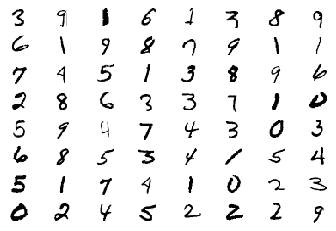

In [15]:
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(x_train_drawing[randint(0, x_train.shape[0])], cmap='Greys')

## Neural Network

We design a neural network to solve MNIST. It has a single hidden layer with 32 nodes.

In [5]:
model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


## Train & Evaluate The Network

This code trains and evaluates the model we defined above.

In [3]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])


In [4]:
model.fit(x_train, y_train, batch_size=128, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.7042 - accuracy: 0.8200
Epoch 2/5
60000/60000 [==============================] - 1s 15us/step - loss: 0.3572 - accuracy: 0.9074
Epoch 3/5
60000/60000 [==============================] - 1s 15us/step - loss: 0.2916 - accuracy: 0.9228
Epoch 4/5
60000/60000 [==============================] - 1s 15us/step - loss: 0.2547 - accuracy: 0.9321
Epoch 5/5
60000/60000 [==============================] - 1s 15us/step - loss: 0.2291 - accuracy: 0.9389


In [19]:
loss, accuracy  = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy:.3}')

10000/10000 [==============================] - 0s 13us/step
Test accuracy: 0.888


In [30]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [11]:
y_pred = model.predict(x_test)

In [17]:
print(y_pred[:9].round())
print(y_test[:9])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


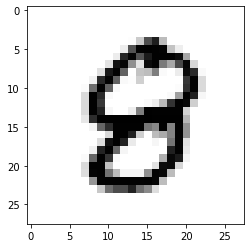

In [40]:
rd=randint(0, x_test.shape[0])
plt.imshow(x_test_drawing[rd], cmap='Greys')

In [42]:
print(y_pred[rd])
print(y_pred[rd].round())

[0.02834265 0.01066917 0.03439402 0.0220306  0.0111017  0.03483087
 0.02701708 0.0030446  0.7904302  0.0381391 ]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
